<a href="https://colab.research.google.com/github/varunkr24/Coputer-Vision/blob/Python/Dynamic%2BBounding%2BBoxes%2Bto%2Blocate%2Bvehicles%2Bin%2Ba%2Bvideo%2Busing%2BComputer%2BVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
from zipfile import ZipFile
import cv2
import matplotlib.pyplot as plt

In [ ]:
import os
#os.getcwd()
os.chdir('C:\\Users\\yadavv\\varun\\python_cwd')

In [ ]:
with ZipFile('Part 4 Video.zip','r') as v_file:
    v_file.extractall()

In [ ]:
def fixColor(image):
    return(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
from IPython.display import Video

In [ ]:
Video('Video/video1.mp4',embed=True)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [ ]:
def read_frames_from_video(path):
    video_stream = cv2.VideoCapture(path)
    frame_list = []
    while True:
        #The read method will read every frames in video.If didnt found then it will return ret as False
        ret,frame = video_stream.read()
        if not ret:
            break
        #frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        frame_list.append(frame)
    
    video_stream.release()
    return frame_list

In [ ]:
frame_list = read_frames_from_video('Video/video1.mp4')
len(frame_list)

2648

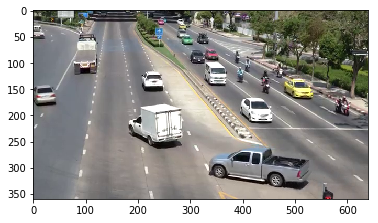

In [ ]:
plt.imshow(cv2.cvtColor(frame_list[700],cv2.COLOR_BGR2RGB))
plt.show();

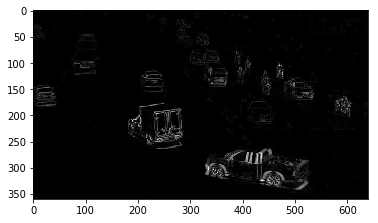

In [ ]:
# convert the frames to grayscale
grayA = cv2.cvtColor(frame_list[700], cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(frame_list[701], cv2.COLOR_BGR2GRAY)

# plot the image after frame differencing
plt.imshow(cv2.absdiff(grayB, grayA), cmap = 'gray')
plt.show()
diff_image = cv2.absdiff(grayB, grayA)

In [ ]:
print(grayA.shape)

(360, 640)


In [ ]:
grayA

array([[ 50,  55,  55, ...,  78,  79,  95],
       [ 66,  58,  57, ...,  74,  83, 102],
       [ 64,  53,  54, ...,  66,  89,  97],
       ...,
       [107, 107, 107, ..., 136, 136, 136],
       [107, 107, 107, ..., 136, 136, 136],
       [107, 107, 107, ..., 135, 135, 135]], dtype=uint8)

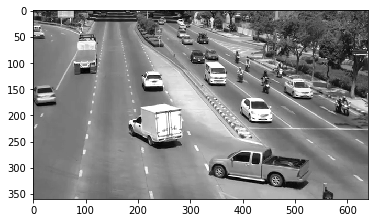

In [ ]:
plt.imshow(grayA,cmap='gray')
plt.show()

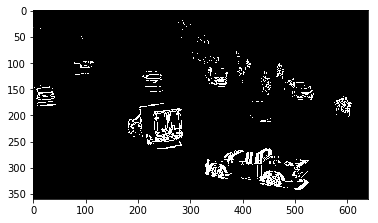

In [ ]:
# perform image thresholding
ret, thresh = cv2.threshold(diff_image, 35, 255, cv2.THRESH_BINARY)
#ret, thresh = cv2.threshold(blurred, 5, 255, cv2.THRESH_BINARY)

# plot image after thresholding
plt.imshow(thresh, cmap = 'gray')
plt.show()

In [ ]:
a = np.ones((3,4))
a

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

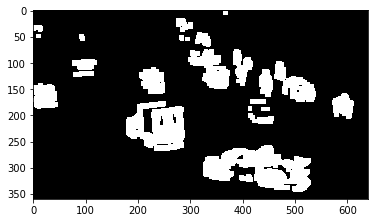

In [ ]:
# apply image dilation
kernel = np.ones((3,3),np.uint8)
dilated = cv2.dilate(thresh,kernel,iterations =4)

# plot dilated image
plt.imshow(dilated, cmap = 'gray')
plt.show()

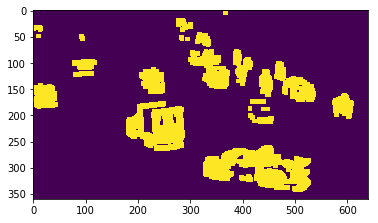

In [ ]:
# plot vehicle detection zone
plt.imshow(dilated)
cv2.line(dilated, (0, 50),(640,50),(100, 0, 0))
plt.show()

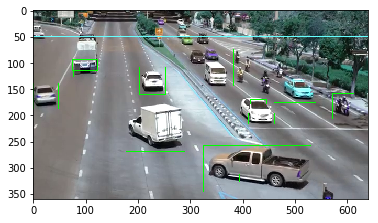

In [ ]:
contours, hierarchy = cv2.findContours(dilated.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

valid_cntrs = []
dmy = frame_list[700].copy()
for i,cntr in enumerate(contours):
    x,y,w,h = cv2.boundingRect(cntr)
        
    if (x <= 640) & (y >= 50) & (cv2.contourArea(cntr) >= 200):
        #print("x,y,w,h,contourArea(cntr):",x,y,w,h,cv2.contourArea(cntr))
        #valid_cntrs.append(cntr)
        cv2.rectangle(dmy,(x,y),(x+w,y+h),(0,255,0),1)
        

# count of discovered contours        
#len(valid_cntrs)
#cv2.drawContours(dmy, valid_cntrs, -1, (127,200,0), 2)
cv2.line(dmy, (0, 50),(640,50),(100, 255, 255))
plt.imshow(dmy)
plt.show()

In [ ]:
def draw_bounding_box_on_vehicle(frame_list,file_name):
    kernel = np.ones((3,3),np.uint8)
    #dmy_lst = []

    # specify video name
    #file_name = 'vehicle_detection_Output.mp4'

    # specify frames per second
    fps = 14.0
    HEIGHT,WIDTH,_ = frame_list[0].shape

    size=(WIDTH,HEIGHT)

    out = cv2.VideoWriter(file_name,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)


    for i in range(len(frame_list)-1):

        # frame differencing
        grayA = cv2.cvtColor(frame_list[i], cv2.COLOR_BGR2GRAY)
        grayB = cv2.cvtColor(frame_list[i+1], cv2.COLOR_BGR2GRAY)
        diff_image = cv2.absdiff(grayB, grayA)

        # image thresholding
        ret, thresh = cv2.threshold(diff_image, 35, 255, cv2.THRESH_BINARY)

        # image dilation
        dilated = cv2.dilate(thresh,kernel,iterations = 4)

        # find contours
        contours, hierarchy = cv2.findContours(dilated.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

        # shortlist contours appearing in the detection zone
        org_copy = frame_list[i].copy()
        for cntr in contours:
            x,y,w,h = cv2.boundingRect(cntr)
            if (x <= 640) & (y >= 50) & (cv2.contourArea(cntr) >= 200):
                cv2.rectangle(org_copy,(x,y),(x+w,y+h),(0,255,0),1)

        #    
        out.write(org_copy)
        #dmy_lst.append(dmy)
    out.release()

In [ ]:
file_name = 'video1.mp4'
frame_list = read_frames_from_video('Video/video1.mp4')
len(frame_list)

2648

In [ ]:
draw_bounding_box_on_vehicle(frame_list,file_name)

In [ ]:
file_name = 'video2.mp4'
frame_list_2 = read_frames_from_video('Video/video2.mp4')
len(frame_list_2)

3407

In [ ]:
draw_bounding_box_on_vehicle(frame_list_2,file_name)

In [ ]:
#To view the output video
def display_output_video(path):
    video_info = cv2.VideoCapture(path)
    while True:
        ret,frame = video_info.read()
        
        if cv2.waitKey(33) == 27:
            break
            
        cv2.imshow('Vehicle With Bounding Box',frame)
        
    video_info.release()
    cv2.destroyAllWindows()

In [ ]:
display_output_video('video1.mp4')

In [ ]:
display_output_video('video2.mp4')